In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

plt.rcParams['font.family'] = 'DejaVu Sans'

In [2]:
# 1️⃣ Đọc dữ liệu từ file JSONL
data_path = '../data/raw/train_data.jsonl'  # đổi đường dẫn tùy cấu trúc dự án của anh
if not os.path.exists(data_path):
    raise FileNotFoundError(f"Không tìm thấy file dữ liệu: {data_path}")

df = pd.read_json(data_path, lines=True, encoding='utf-8')

print("✓ Đọc dữ liệu thành công từ", data_path)

✓ Đọc dữ liệu thành công từ ../data/raw/train_data.jsonl


In [3]:
# 2️⃣ Ánh xạ nhãn thành số
label_mapping = {'positive': 2, 'neutral': 1, 'negative': 0}
df['label'] = df['sentiment'].map(label_mapping)

print(f"Dataset có {len(df)} mẫu.")
print(df['sentiment'].value_counts())

Dataset có 2063 mẫu.
sentiment
negative    756
positive    686
neutral     621
Name: count, dtype: int64


✓ Lưu biểu đồ vào '../results/figures/exploration/eda_visualization.png'
✓ Lưu dataset vào '../data/processed/reviews_with_labels.csv'


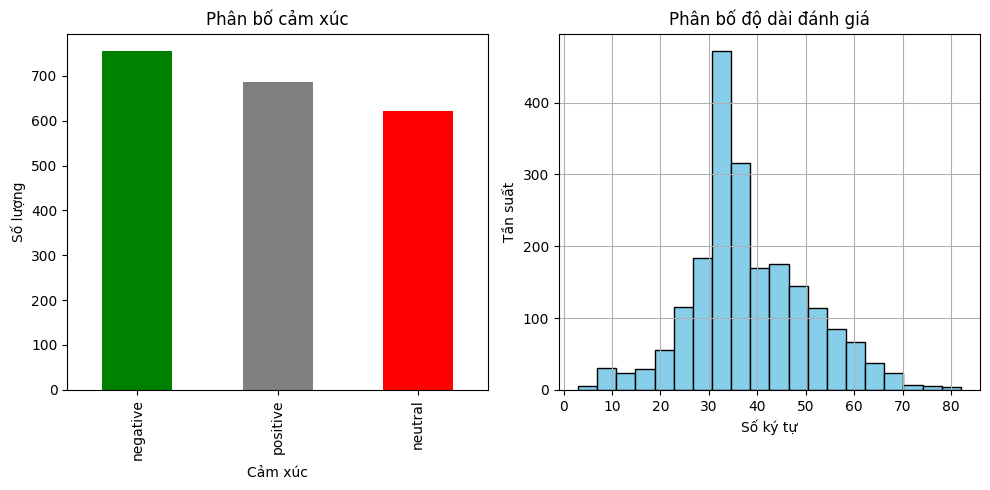

In [4]:
# 3️⃣ EDA: hiển thị mẫu và biểu đồ
plt.figure(num= 'eda', figsize=(10, 5))

# Biểu đồ phân bố cảm xúc
plt.subplot(1, 2, 1)
df['sentiment'].value_counts().plot(kind='bar', color=['green', 'gray', 'red'])
plt.title('Phân bố cảm xúc')
plt.xlabel('Cảm xúc')
plt.ylabel('Số lượng')

# Biểu đồ độ dài review
plt.subplot(1, 2, 2)
df['review'].str.len().hist(bins=20, color='skyblue', edgecolor='black')
plt.title('Phân bố độ dài đánh giá')
plt.xlabel('Số ký tự')
plt.ylabel('Tần suất')


# 4️⃣ Lưu biểu đồ
os.makedirs('../results/figures/exploration', exist_ok=True)
plt.tight_layout()
plt.savefig('../results/figures/exploration/eda_visualization.png', dpi=300, bbox_inches='tight')
print("✓ Lưu biểu đồ vào '../results/figures/exploration/eda_visualization.png'")

# 5️⃣ Lưu dataset dạng CSV
os.makedirs('../data/processed', exist_ok=True)
df.to_csv('../data/processed/reviews_with_labels.csv', index=False)
print("✓ Lưu dataset vào '../data/processed/reviews_with_labels.csv'")